In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('AirPassengers.csv')
data.shape

(144, 2)

In [ ]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


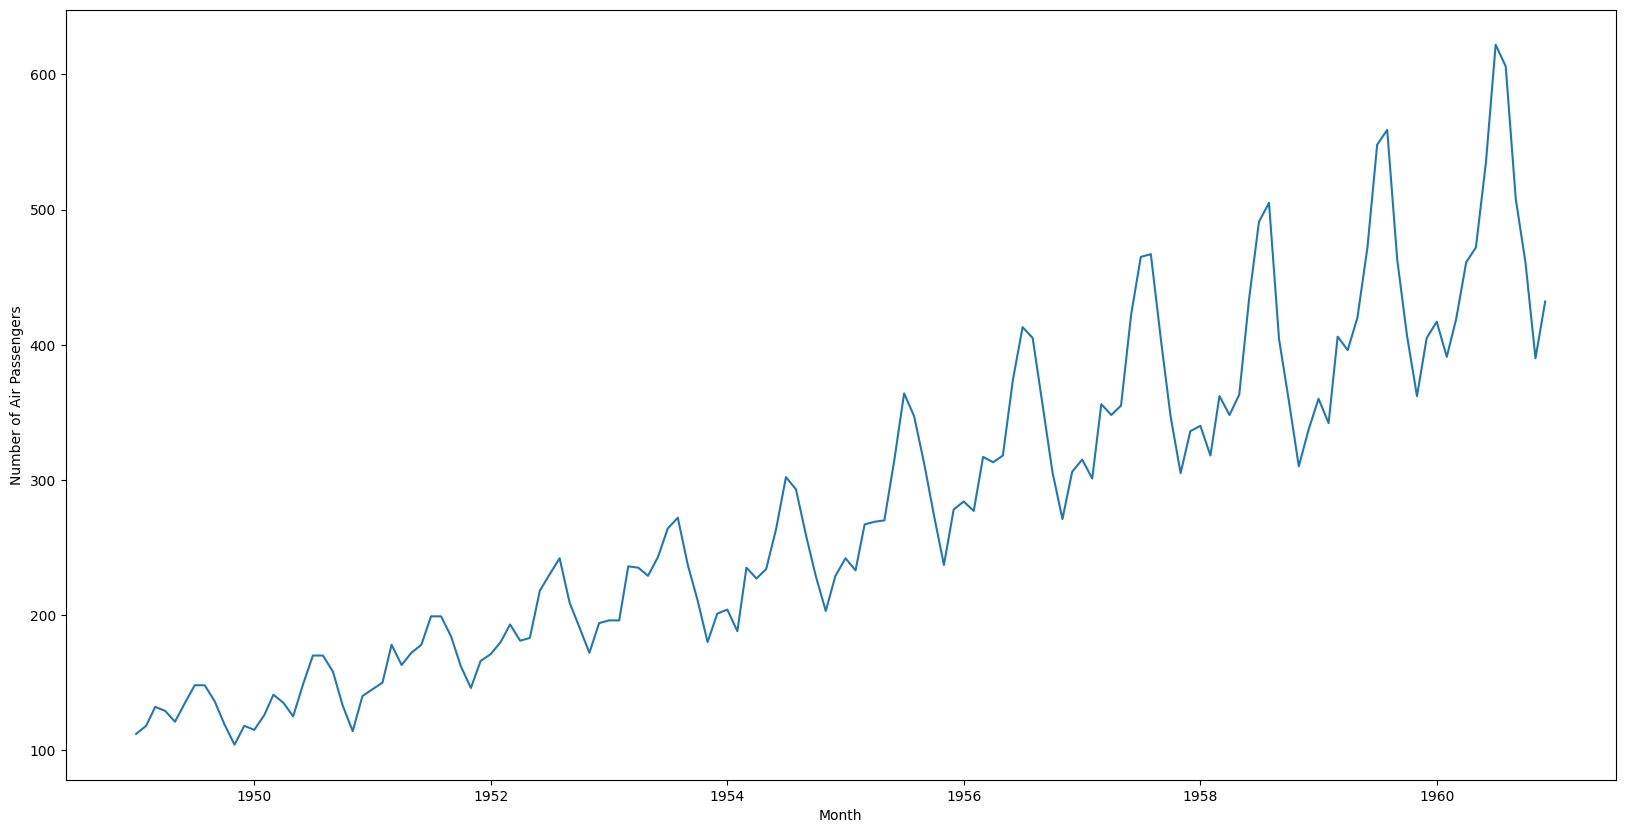

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


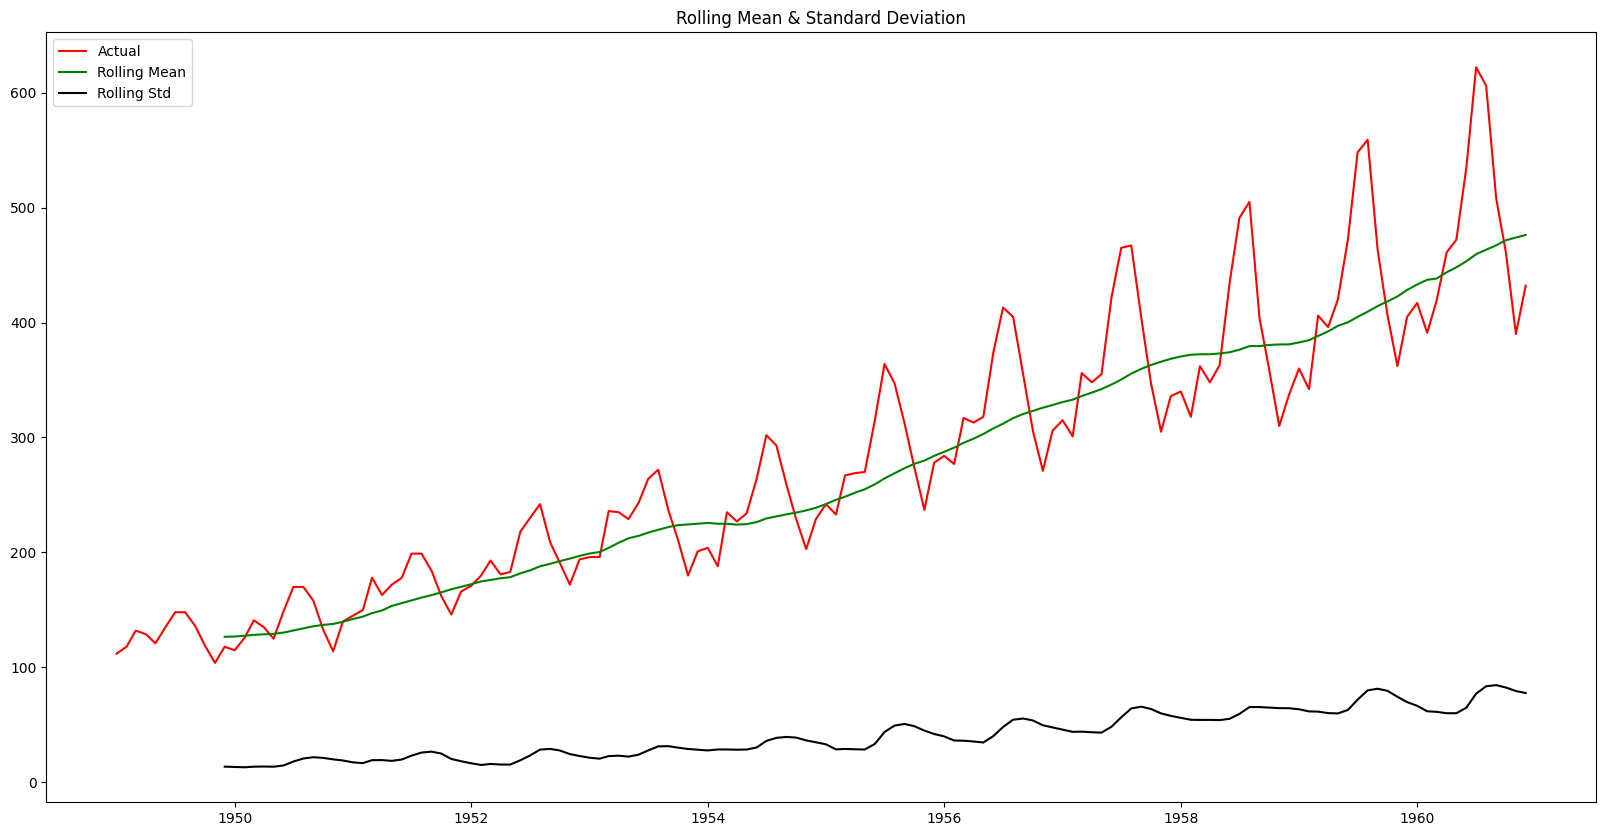

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

**Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.**

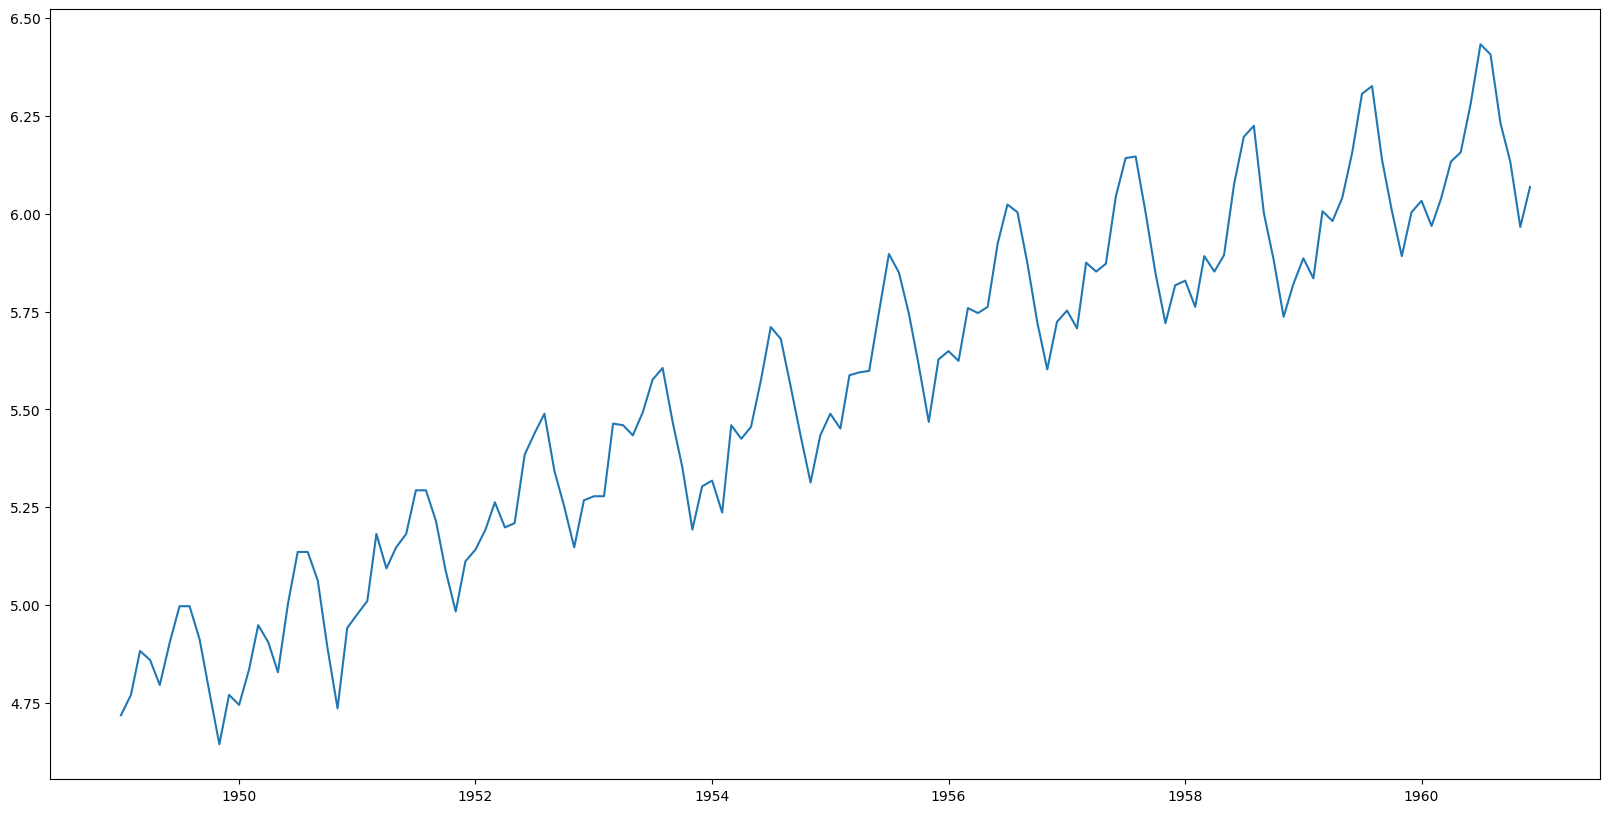

In [ ]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean.

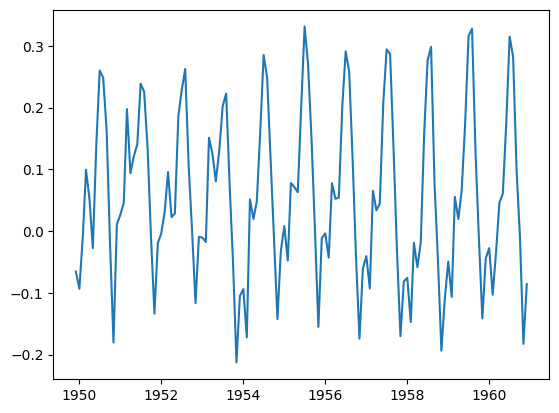

In [ ]:
rolling_mean = data_log.rolling(window=12).mean()
df_log_minus_mean = data_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
#get_stationarity(df_log_minus_mean)
plt.plot(df_log_minus_mean)

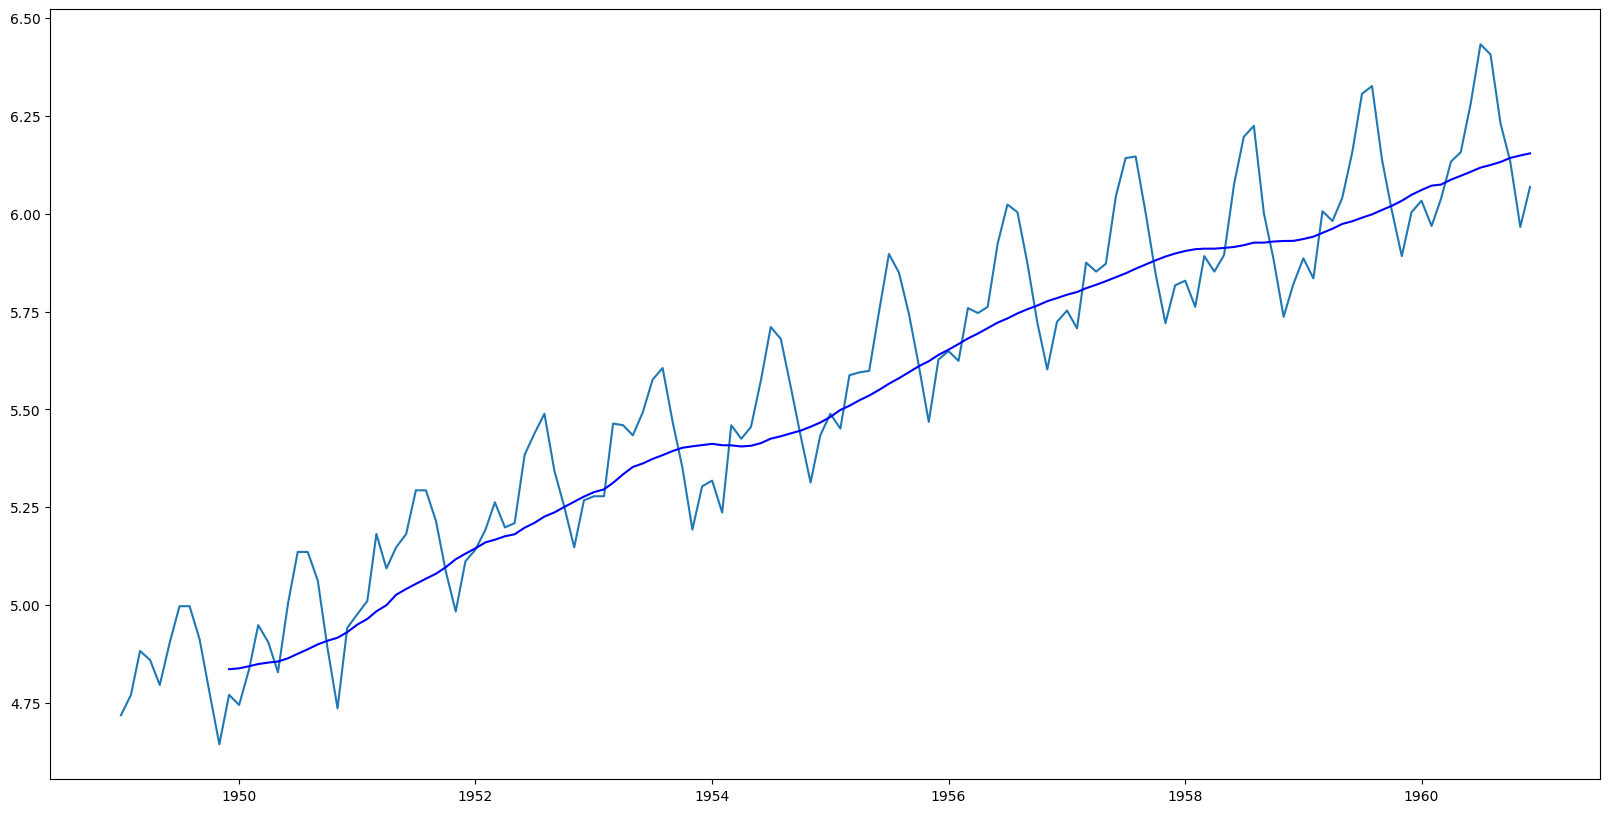

In [ ]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

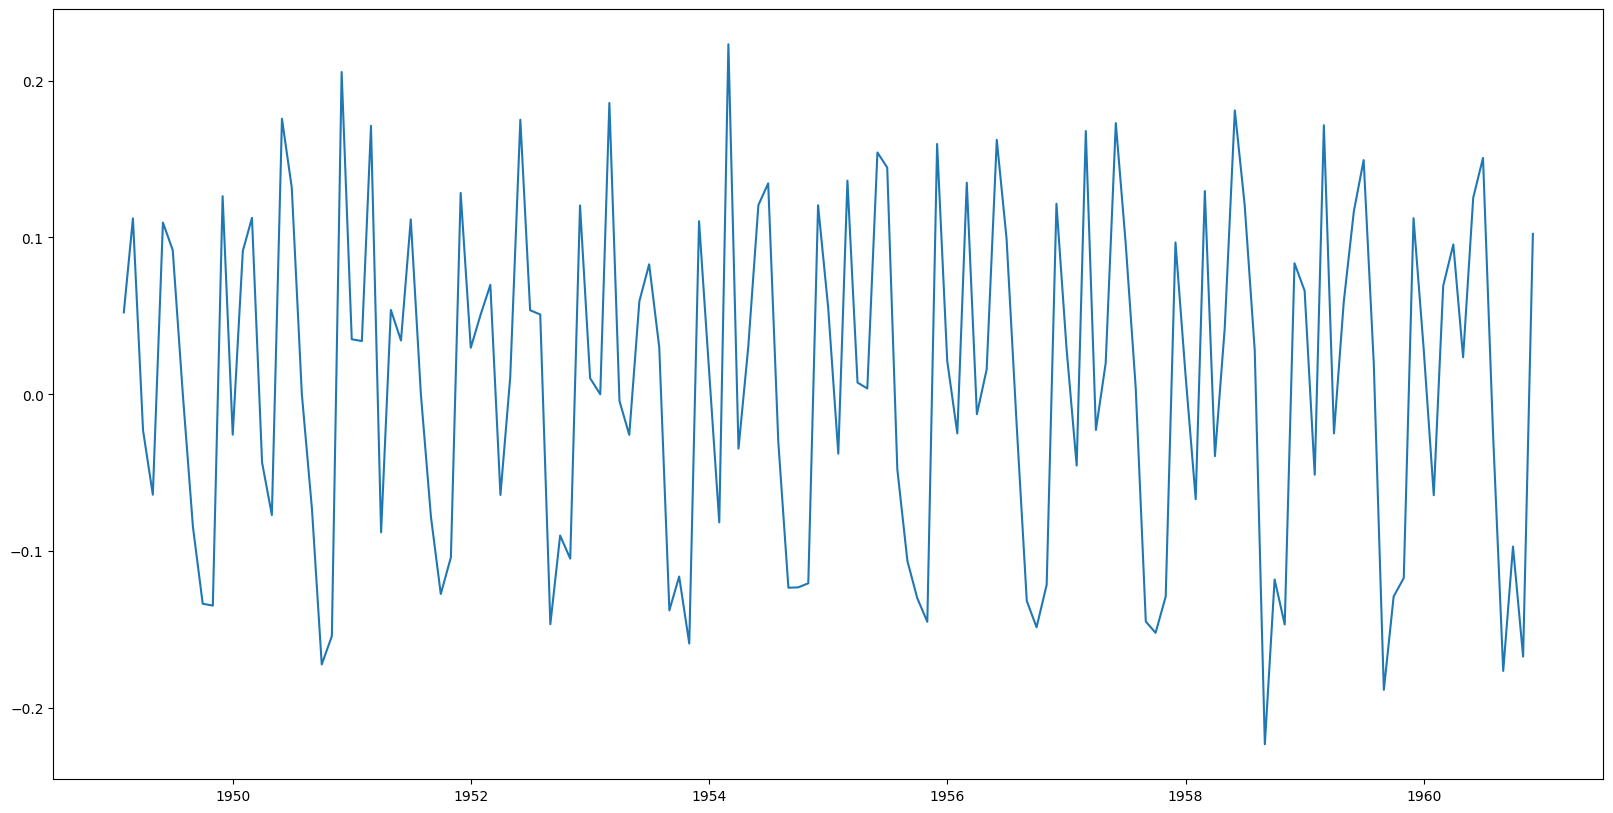

In [ ]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

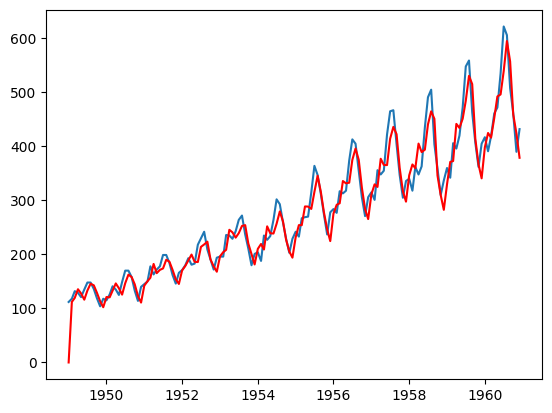

In [ ]:

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data,order=(2,1,2))
#model = ARIMA(data, order=(2,1,2))
results = model.fit()
plt.plot(data)
plt.plot(results.fittedvalues, color='red')

In [ ]:
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing

<Axes: xlabel='Month'>

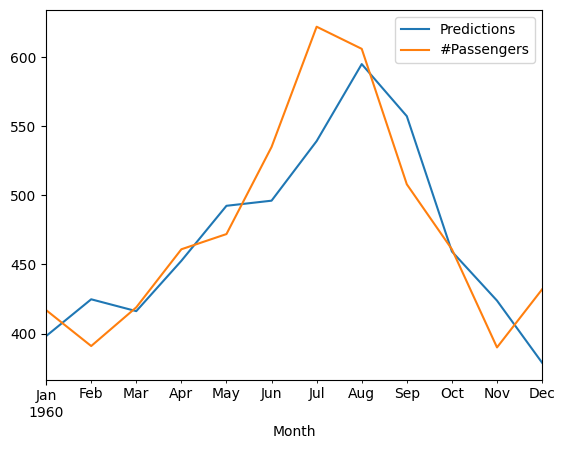

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = results.predict(start, end, typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)